# Notebook with notes and accesories test for data
This book contains some notes a test for the data management

## Modules

In [47]:
# Modules ad-hoc for the app
from src.get_data.lee_ree import consulta_ree_hour
from src.get_data import analisis_ree as a_ree
from src.get_data import lee_ree

# Object connections and constants
from src.connect_db import client_influx
from src.connect_db import client_df
from src.connect_db import client_mongo
from src.config import REE_KEY
from src.config import PORT_MONGO
from src.config import AEMET_KEY

# modules from python
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import sys

import requests

### Testing influx content

In [4]:
df=client_df

AEMET variables:

In [5]:
q_str=''' SELECT * FROM "Clima" '''# WHERE time < now()-5d AND time > now() - 15d'''
res=df.query(q_str)

In [6]:
#res=client_influx.query('select * from "demanda-real"')
points=res.items()

In [7]:
points=list(points)
clima=points[0][1]
clima.shape

(15081, 895)

In [8]:
estaciones=set([ele.split('-')[-1] for ele in list(clima.columns)])
len(estaciones)
variables=set([ele.split('-')[0] for ele in list(clima.columns)])
variables

{'inso', 'racha', 'sol', 'velmedia'}

In [9]:
col_velmedia=[ele for ele in clima.columns if ele.split('-')[0]=='velmedia']
clima_velmedia=clima[[*col_velmedia]]
clima_velmedia

,velmedia,velmedia-0002I,velmedia-0016A,velmedia-0076,velmedia-0149X,velmedia-0200E,velmedia-0201D,velmedia-0252D,velmedia-0255B,velmedia-0324A,...,velmedia-C449C,velmedia-C459Z,velmedia-C619Y,velmedia-C629X,velmedia-C649I,velmedia-C659H,velmedia-C659M,velmedia-C689E,velmedia-C839X,velmedia-C929I
2020-01-01 00:00:00+00:00,NaN,0.8,1.1,2.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,8.9
2020-01-01 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:40:00+00:00,NaN,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:50:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-20 06:00:00+00:00,NaN,NaN,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,...,2.8,NaN,8.1,NaN,7.8,NaN,NaN,NaN,5.4,8.0
2020-05-20 07:00:00+00:00,NaN,NaN,0.9,4.4,1.0,NaN,NaN,NaN,NaN,NaN,...,1.8,NaN,9.5,NaN,8.4,NaN,NaN,NaN,6.5,6.1
2020-05-20 08:00:00+00:00,NaN,NaN,0.8,3.6,1.3,NaN,NaN,NaN,NaN,NaN,...,1.4,NaN,7.5,NaN,9.1,NaN,NaN,NaN,NaN,6.7
2020-05-20 09:00:00+00:00,NaN,NaN,0.4,2.9,1.1,NaN,NaN,NaN,NaN,NaN,...,2.3,NaN,7.4,NaN,8.8,NaN,NaN,NaN,8.6,7.0


In [10]:
clima_velmedia_h=clima_velmedia.groupby(pd.Grouper(freq='H')).mean()

In [11]:
clima_velmedia_h.shape

(3371, 257)

In [12]:
clima_vel_suma=clima_velmedia_h.count(axis=1)

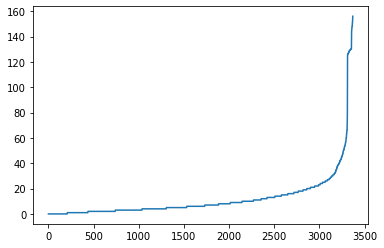

In [13]:
plt.plot(clima_vel_suma.sort_values().values)

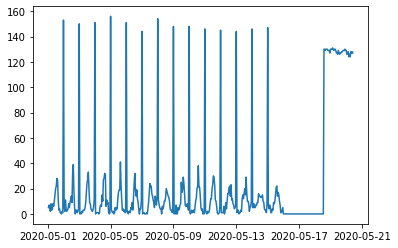

In [14]:
clima_vel_suma.index=clima_vel_suma.index.tz_convert(None)
plt.plot(clima_vel_suma.loc[clima_vel_suma.index>dt.datetime(2020,5,1,0,0)])

###### Last day analysis

In [15]:
q_str=''' SELECT * FROM "Clima" WHERE time > now()-2d '''
res=df.query(q_str)

In [16]:
points=list(res.items())
len(points[0][1])

45

In [17]:
clima_1=points[0][1]
sum(clima_1.isna().sum().sort_values()==0)

276

In [18]:
clima_1_num_col=clima_1.isna().sum()==0
col_num=[ ele for ele,val in clima_1_num_col.iteritems() if val ]

clima_1_num=clima_1[[*col_num]]
clima_1_num

,racha-0149X,racha-1109X,racha-1111X,racha-1183X,racha-1207U,racha-1249X,racha-1351,racha-1387,racha-1400,racha-1484C,...,velmedia-B691Y,velmedia-B893,velmedia-B954,velmedia-C029O,velmedia-C139E,velmedia-C249I,velmedia-C419L,velmedia-C429I,velmedia-C449C,velmedia-C929I
2020-05-18 14:00:00+00:00,4.2,9.3,8.1,5.1,8.1,5.0,11.0,5.1,5.8,7.4,...,3.8,2.4,7.2,8.8,7.5,7.6,2.4,9.5,3.5,6.1
2020-05-18 15:00:00+00:00,6.1,9.3,8.5,6.0,7.2,6.3,10.4,5.0,7.4,6.2,...,3.1,3.1,6.6,8.8,6.5,6.4,2.1,8.8,4.8,7.3
2020-05-18 16:00:00+00:00,7.9,9.3,8.6,6.4,7.2,5.5,11.0,4.1,6.0,6.3,...,3.1,5.0,6.8,9.7,6.1,7.2,2.5,8.9,5.7,7.9
2020-05-18 17:00:00+00:00,6.6,9.3,8.6,6.1,6.7,4.9,9.7,4.1,7.0,6.1,...,1.0,5.5,5.6,8.0,7.2,7.5,3.4,9.0,3.3,6.8
2020-05-18 18:00:00+00:00,4.2,8.2,8.0,5.4,6.9,4.9,10.6,4.8,6.3,5.6,...,2.4,3.1,5.0,6.8,7.9,7.1,4.0,9.0,5.7,7.6
2020-05-18 19:00:00+00:00,4.5,7.2,7.3,5.7,5.3,4.0,12.1,4.4,6.1,4.2,...,1.4,3.3,2.6,8.1,7.5,5.2,3.2,8.1,5.4,8.3
2020-05-18 20:00:00+00:00,3.8,6.7,7.5,5.1,4.6,2.4,12.5,3.1,6.8,4.4,...,1.9,3.3,3.1,7.0,7.8,3.9,2.1,6.0,2.7,8.2
2020-05-18 21:00:00+00:00,2.5,4.6,5.0,3.6,3.6,2.8,12.6,2.3,7.1,1.3,...,1.3,2.8,2.1,6.2,7.4,6.3,1.3,6.5,1.6,8.0
2020-05-18 22:00:00+00:00,2.1,3.6,5.1,2.6,3.8,1.8,12.0,2.0,7.9,3.1,...,1.4,3.3,0.7,5.4,7.2,4.7,1.1,4.4,1.4,7.9
2020-05-18 23:00:00+00:00,2.0,2.1,3.9,3.9,3.7,1.9,11.9,2.1,7.5,2.7,...,2.2,2.7,0.7,4.3,6.5,4.5,2.1,3.7,3.1,7.7


In [19]:
type(clima_1_num.index[0])
print('clima_1_num: ',clima_1_num.index.min(),clima_1_num.index.max() )

clima_1_num:  2020-05-18 14:00:00+00:00 2020-05-20 10:00:00+00:00


---
REE Eolic

In [20]:
q_str=''' SELECT * FROM "Generación medida Eólica" '''# WHERE time < now()-5d AND time > now() - 15d'''
res=df.query(q_str)

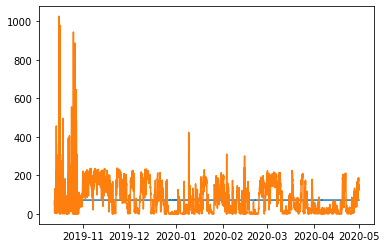

In [21]:
points=list(res.items())
g_eolica=points[0][1]
plt.plot(g_eolica)

In [22]:
g_eolica.describe()

,geo_id,value
count,4824.000000,4824.000000
mean,70.366501,78.967638
std,6.604179,82.280720
min,22.000000,0.001000
25%,72.000000,8.034500
50%,72.000000,52.188000
75%,72.000000,139.763250
max,72.000000,1026.925000


In [23]:
type(g_eolica.index[0])
print('g_eolica: ',g_eolica.index.min(),g_eolica.index.max() )

g_eolica:  2019-10-12 22:00:00+00:00 2020-04-30 21:00:00+00:00


In [32]:
q_str=''' SELECT * FROM "Clima" WHERE time > now()-4w '''
res=df.query(q_str)

In [33]:
points=list(res.items())
print('Num de muestras: ',len(points[0][1]))
clima_4w=points[0][1]

Num de muestras:  2416


In [35]:
print('clima_4w: ',clima_4w.index.min(),clima_4w.index.max() )

clima_4w:  2020-04-22 13:50:00+00:00 2020-05-20 10:00:00+00:00


In [52]:
clima_4w_gen=clima_4w.join(g_eolica['value'],how='inner')
print(clima_4w_gen.shape)

sum(clima_4w_gen.isna().sum())

(101, 872)


86387

--- 
Models

In [310]:
from sklearn.neural_network import MLPRegressor

---
Clima history Analysis 

number of points:  1023
number of columns:  714


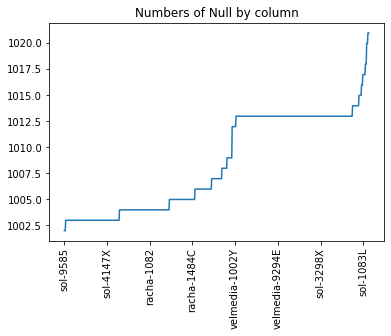

In [181]:
points=list(points)
print('number of points: ',len(points[0][1]))
clima_train=points[0][1]
print('number of columns: ',clima_train.shape[1])

tick_spacing = 100
fig, ax = plt.subplots()
ax.plot(clima_train.isna().sum().sort_values())
ax.set_title('Numbers of Null by column')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation='vertical')
plt.show()

In [186]:
clima_train_int=clima_train.interpolate(limit=2,axis=0)

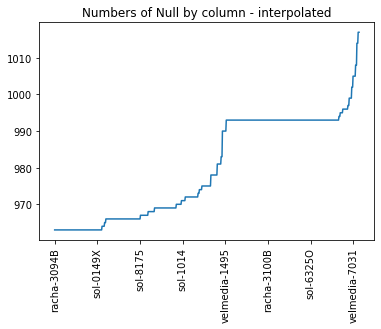

In [187]:
tick_spacing = 100
fig, ax = plt.subplots()
ax.plot(clima_train_int.isna().sum().sort_values())
ax.set_title('Numbers of Null by column - interpolated')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation='vertical')
plt.show()

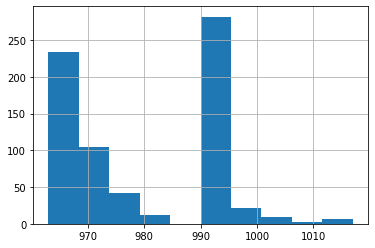

In [188]:
clima_train_int.isna().sum().hist()


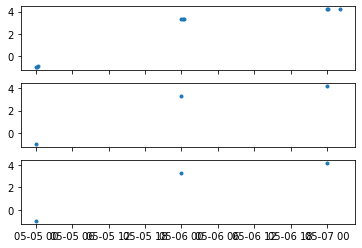

In [189]:
var='velmedia-1542'
fig, ax = plt.subplots(3,1,sharex='col')

ax[0].plot(clima_train_int[var],'.')

ax[1].plot(points[0][1][var],'.')

ax[2].plot(clima_train[var],'.')

In [202]:
clima_train_h=clima_train.resample('H').mean()
print(clima_train_h.shape)
clima_train_h.isna().sum().sort_values()

(241, 714)


sol-4511C         221
velmedia-4452     221
racha-5514        221
velmedia-4386B    221
sol-2374X         221
                 ... 
racha-1542        238
velmedia-1542     238
velmedia-5530E    239
sol-5530E         239
racha-5530E       239
Length: 714, dtype: int64

In [190]:
clima=points[0][1]

In [191]:
clima.index=clima.index.tz_convert(None)

In [192]:
clima_train=clima.loc[clima.index>dt.datetime(2020,4,16,0,0)]

In [193]:
columns_na=clima_train.isna().sum()
columns_use=columns_na[columns_na==0]

In [129]:
clima_train[[*list(columns_use.index)]]

""
2020-05-14 19:41:00
2020-05-14 19:50:00
2020-05-14 20:10:00
2020-05-14 20:46:00
2020-05-14 20:50:00
...
2020-05-19 15:00:00
2020-05-19 16:00:00
2020-05-19 17:00:00
2020-05-19 18:00:00


### Connect to REE-ESIOS

##### Checking the indicators availables

In [17]:
url='https://api.esios.ree.es/indicators'
header={'Accept': 'application/json;application/vnd.esios-api-v1+json',
        'Content-Type': 'application/json',
        'Host': 'api.esios.ree.es',
        'Authorization': f'Token token="{REE_KEY}"'}
res=requests.get(url,headers=header)

In [18]:
datos=res.json()
names=[ele['name'] for ele in datos['indicators']]

In [30]:
datos['indicators'][296]['description']

'<p>Generación medida en tiempo real del tipo de producción solar.</p><p>El desglose de este indicador detalla la energía generada como solar térmica y como solar fotovoltaica.</p><p>Este indicador tiene datos desde el 02/06/2015 a las 21:00 horas, momento a partir del cual se empezaron a registrar telemedidas de generación solar con dicho desglose.</p><p><b>Publicación:</b> cada 10 minutos con la información de las tres últimas horas del día D-1 hasta la hora actual del día D.</p>'

In [29]:
datos['indicators'][296]['name']

'Generación T.Real Solar'

In [31]:
datos['indicators'][296]['id']

10206

In [580]:
names.index("Generación medida Solar fotovoltaica")

680

##### Checking particular indicator content

In [32]:
diff_time=dt.timedelta(days=15)
data_ini=dt.datetime(2020,3,15,0,0)
data_fin=dt.datetime(2020,3,16,0,0)
url='https://api.esios.ree.es/indicators/'
indicator=['10206']
header={'Accept': 'application/json;application/vnd.esios-api-v1+json',
        'Content-Type': 'application/json',
        'Host': 'api.esios.ree.es',
        'Authorization': f'Token token={REE_KEY}'}

parm={'start_date':data_ini,
      'end_date':data_fin}
res=requests.get(url+indicator[0],params=parm,headers=header)
res.json()['indicator'].keys()

dict_keys(['name', 'short_name', 'id', 'composited', 'step_type', 'disaggregated', 'magnitud', 'tiempo', 'geos', 'values_updated_at', 'values'])

In [33]:
[print(value,':',res.json()['indicator'][value]) for value in res.json()['indicator'].keys()]

name : Generación T.Real Solar
short_name : Solar
id : 10206
composited : True
step_type : linear
disaggregated : False
magnitud : [{'name': 'Potencia', 'id': 20}]
tiempo : [{'name': 'Diez minutos', 'id': 154}]
geos : [{'geo_id': 8741, 'geo_name': 'Península'}]
values_updated_at : 2020-03-16T00:09:00.000+01:00
values : [{'value': 103.0, 'datetime': '2020-03-15T00:00:00.000+01:00', 'datetime_utc': '2020-03-14T23:00:00Z', 'tz_time': '2020-03-14T23:00:00.000Z', 'geo_id': 8741, 'geo_name': 'Península'}, {'value': 97.0, 'datetime': '2020-03-15T00:10:00.000+01:00', 'datetime_utc': '2020-03-14T23:10:00Z', 'tz_time': '2020-03-14T23:10:00.000Z', 'geo_id': 8741, 'geo_name': 'Península'}, {'value': 84.0, 'datetime': '2020-03-15T00:20:00.000+01:00', 'datetime_utc': '2020-03-14T23:20:00Z', 'tz_time': '2020-03-14T23:20:00.000Z', 'geo_id': 8741, 'geo_name': 'Península'}, {'value': 73.0, 'datetime': '2020-03-15T00:30:00.000+01:00', 'datetime_utc': '2020-03-14T23:30:00Z', 'tz_time': '2020-03-14T23:30:0

[None, None, None, None, None, None, None, None, None, None, None]

## Connect AEMET

In [15]:
# conectar AEMET

url = "https://opendata.aemet.es/opendata/api/maestro/municipios"
querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
len(response.json())

8122

In [111]:
response.json()[1]

{'latitud': '40º54\'58.824504"',
 'id_old': '40004',
 'url': 'abades-id40001',
 'latitud_dec': '40.91634014',
 'altitud': '971',
 'capital': 'Abades',
 'num_hab': '873',
 'zona_comarcal': '674001',
 'destacada': '0',
 'nombre': 'Abades',
 'longitud_dec': '-4.26787389',
 'id': 'id40001',
 'longitud': '-4º16\'4.346004"'}

In [29]:
db=client_mongo.ereal_collections
municipio=db.municipio
result=municipio.insert_many(response.json())

In [142]:
# conectar AEMET
url = "https://opendata.aemet.es/opendata/api/valores/climatologicos/inventarioestaciones/todasestaciones"
querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

{
  "descripcion" : "exito",
  "estado" : 200,
  "datos" : "https://opendata.aemet.es/opendata/sh/42d065a0",
  "metadatos" : "https://opendata.aemet.es/opendata/sh/0556af7a"
}


In [145]:
url = "https://opendata.aemet.es/opendata/sh/42d065a0"
querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

[ {
  "latitud" : "413515N",
  "provincia" : "BARCELONA",
  "altitud" : "74",
  "indicativo" : "0252D",
  "nombre" : "ARENYS DE MAR",
  "indsinop" : "08186",
  "longitud" : "023224E"
}, {
  "latitud" : "411734N",
  "provincia" : "BARCELONA",
  "altitud" : "4",
  "indicativo" : "0076",
  "nombre" : "BARCELONA AEROPUERTO",
  "indsinop" : "08181",
  "longitud" : "020412E"
}, {
  "latitud" : "412506N",
  "provincia" : "BARCELONA",
  "altitud" : "408",
  "indicativo" : "0200E",
  "nombre" : "BARCELONA, FABRA",
  "indsinop" : "",
  "longitud" : "020727E"
}, {
  "latitud" : "412326N",
  "provincia" : "BARCELONA",
  "altitud" : "6",
  "indicativo" : "0201D",
  "nombre" : "BARCELONA",
  "indsinop" : "08180",
  "longitud" : "021200E"
}, {
  "latitud" : "414312N",
  "provincia" : "BARCELONA",
  "altitud" : "291",
  "indicativo" : "0149X",
  "nombre" : "MANRESA",
  "indsinop" : "08174",
  "longitud" : "015025E"
}, {
  "latitud" : "413125N",
  "provincia" : "BARCELONA",
  "altitud" : "146",
  "indi

In [146]:
len(response.json())

291

In [147]:
estaciones=db.estaciones
result=estaciones.insert_many(response.json())

In [148]:
url = "https://opendata.aemet.es/opendata/api/valores/climatologicos/inventarioestaciones/estaciones/0076"
querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

{
  "descripcion" : "exito",
  "estado" : 200,
  "datos" : "https://opendata.aemet.es/opendata/sh/0f78f1fc",
  "metadatos" : "https://opendata.aemet.es/opendata/sh/0556af7a"
}


In [149]:
url = "https://opendata.aemet.es/opendata/sh/0f78f1fc"
querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

[ {
  "latitud" : "411734N",
  "provincia" : "BARCELONA",
  "altitud" : "4",
  "indicativo" : "0076",
  "nombre" : "BARCELONA AEROPUERTO",
  "indsinop" : "08181",
  "longitud" : "020412E"
} ]


In [40]:
data_ini=dt.datetime(2020,5,1,0,0)
data_fin=dt.datetime(2020,5,15,0,0)
url="https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/"
url+=data_ini.isoformat()+"UTC/fechafin/"+data_fin.isoformat()+"UTC/todasestaciones"

querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

{
  "descripcion" : "exito",
  "estado" : 200,
  "datos" : "https://opendata.aemet.es/opendata/sh/6281b035",
  "metadatos" : "https://opendata.aemet.es/opendata/sh/b3aa9d28"
}


In [41]:
url = "https://opendata.aemet.es/opendata/sh/6281b035"
querystring = {"api_key":AEMET_KEY}
headers = {
    'cache-control': "no-cache"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

[ {
  "fecha" : "2020-05-01",
  "indicativo" : "4358X",
  "nombre" : "DON BENITO",
  "provincia" : "BADAJOZ",
  "altitud" : "273",
  "tmed" : "18,3",
  "prec" : "0,0",
  "tmin" : "12,1",
  "horatmin" : "05:00",
  "tmax" : "24,5",
  "horatmax" : "16:10",
  "dir" : "29",
  "velmedia" : "2,5",
  "racha" : "9,7",
  "horaracha" : "12:40",
  "sol" : "10,7",
  "presMax" : "991,6",
  "horaPresMax" : "10",
  "presMin" : "989,2",
  "horaPresMin" : "18"
}, {
  "fecha" : "2020-05-01",
  "indicativo" : "4220X",
  "nombre" : "PUEBLA DE DON RODRIGO",
  "provincia" : "CIUDAD REAL",
  "altitud" : "486",
  "tmed" : "16,2",
  "prec" : "0,0",
  "tmin" : "9,2",
  "horatmin" : "04:50",
  "tmax" : "23,1",
  "horatmax" : "15:20",
  "dir" : "22",
  "velmedia" : "1,7",
  "racha" : "8,1",
  "horaracha" : "15:00"
}, {
  "fecha" : "2020-05-01",
  "indicativo" : "C447A",
  "nombre" : "TENERIFE NORTE AEROPUERTO",
  "provincia" : "STA. CRUZ DE TENERIFE",
  "altitud" : "632",
  "tmed" : "16,2",
  "prec" : "0,0",
  "tm

In [42]:
len(response.json())

3283

###### delete a measure in influx

In [102]:
#client_influx.switch_database('db_ereal')
#client_influx.query('DELETE * FROM "Clima"')

ResultSet({})